In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples=2000, cluster_std=[1.5, 2.5, 1.5, 2.5, 0.5, 0.6, 1.1, 1.2, 2, 2 ], centers=10, random_state=101)

In [3]:
df = pd.DataFrame(data[0])
df['target'] = data[1]
df

,0,1,target
0,10.114356,-5.924125,7
1,0.251168,0.754660,0
2,-1.242197,3.352499,0
3,1.201378,6.050632,2
4,3.410509,6.591522,2
...,...,...,...
1995,4.236120,-1.650482,9
1996,9.021671,-5.714502,7
1997,-6.302885,10.076184,3
1998,5.182414,4.902051,2


# K-Means Cluster Creation

In [13]:
from tqdm.notebook import tqdm

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score

  0%|          | 0/10 [00:00<?, ?it/s]

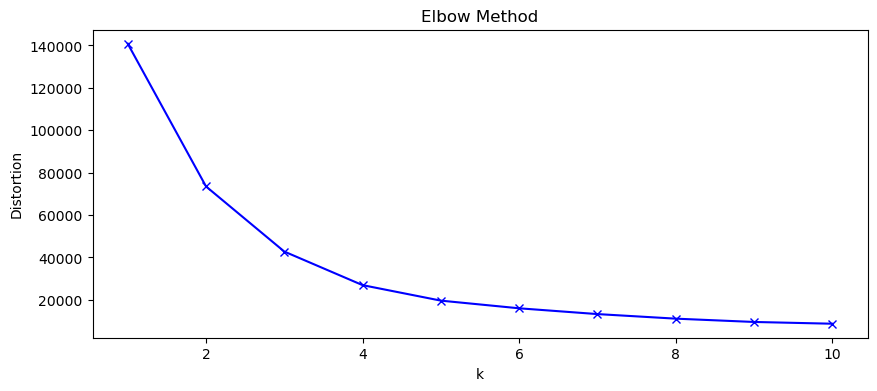

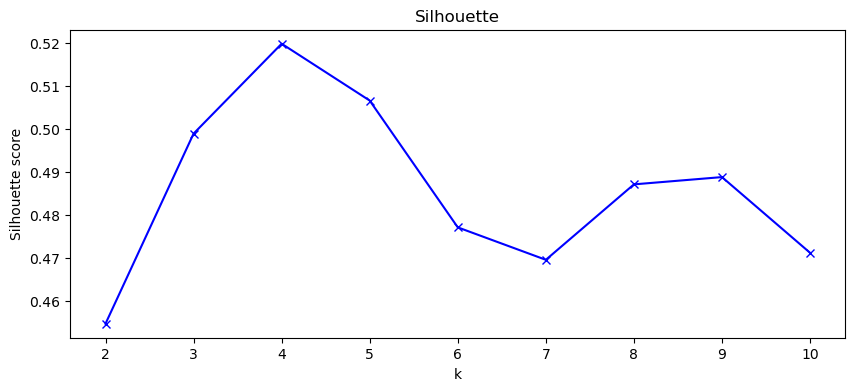

In [26]:
distortions = []
silhouette = []
K = range(1, 11, 1)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data[0])
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(data[0], kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [44]:
homogeneity = []
completeness = []
v_measure = []
adjusted_rand = []
silhouette = [0]

K = range(1, 11, 1)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data[0])
    
    homogeneity.append(homogeneity_score(data[1], kmeanModel.labels_))
    completeness.append(completeness_score(data[1], kmeanModel.labels_))
    v_measure.append(v_measure_score(data[1], kmeanModel.labels_))
    adjusted_rand.append(adjusted_rand_score(data[1], kmeanModel.labels_))
    if k > 1:
        silhouette.append(silhouette_score(data[0], kmeanModel.labels_))
    
    

  0%|          | 0/10 [00:00<?, ?it/s]

In [48]:
pd.DataFrame([homogeneity, completeness, v_measure, adjusted_rand, silhouette], 
             index=['homogeneity', 'completeness', 'v_measure', 'adjusted_rand', 'silhouette'], 
             columns=[str(x) + " clusters" for x in range (1,11,1)])

,1 clusters,2 clusters,3 clusters,4 clusters,5 clusters,6 clusters,7 clusters,8 clusters,9 clusters,10 clusters
homogeneity,0.0,0.244276,0.383551,0.500144,0.578950,0.632441,0.695925,0.739623,0.773670,0.773874
completeness,1.0,0.818110,0.870588,0.889909,0.859013,0.844225,0.836631,0.828362,0.825932,0.801111
v_measure,0.0,0.376218,0.532500,0.640382,0.691709,0.723146,0.759819,0.781481,0.798947,0.787257
adjusted_rand,0.0,0.164820,0.261068,0.369843,0.465040,0.523832,0.613745,0.667234,0.692144,0.662807
silhouette,0.0,0.454526,0.498942,0.519851,0.506649,0.476406,0.469598,0.486794,0.488942,0.471528


In [46]:
names = ['K-Means with ' + str(idx) + ' clusters' for idx in range(2,11,2)]

kmean_clusters = [KMeans(n_clusters=2),
                  KMeans(n_clusters=4),
                  KMeans(n_clusters=6),
                  KMeans(n_clusters=8),
                  KMeans(n_clusters=10)]

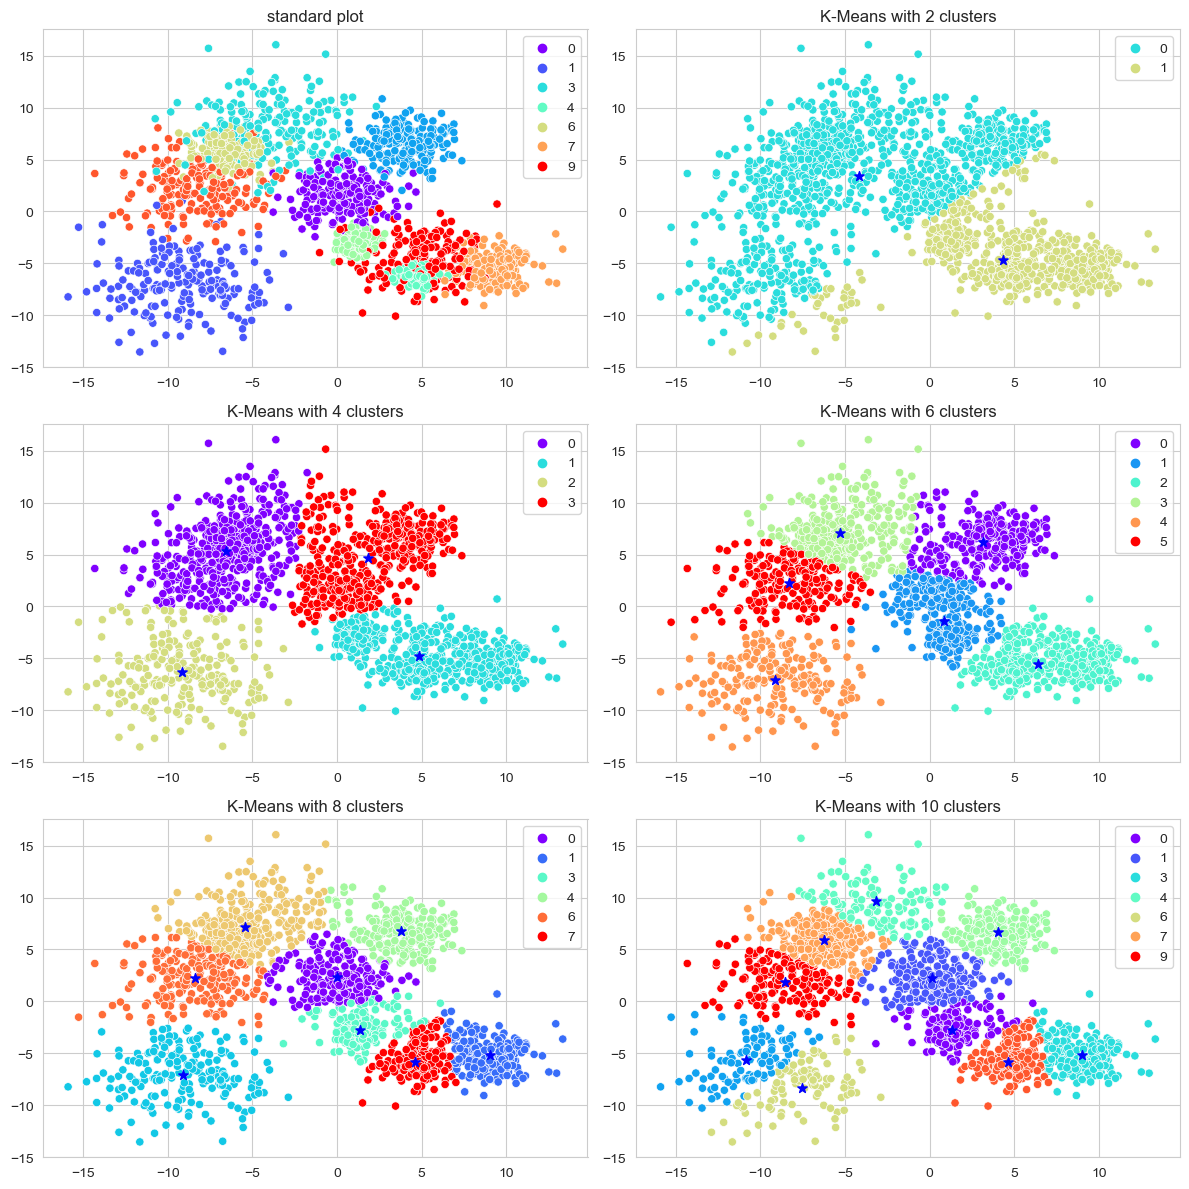

In [47]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
i = 1 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(3, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")

ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, kmeans_cluster in zip(names, kmean_clusters):
    ax = plt.subplot(3, 2, i)
    
    kmeans_cluster.fit(data[0])

    # Plot the testing points
    sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=kmeans_cluster.labels_, palette='rainbow', edgecolors="k")
    ax.scatter(kmeans_cluster.cluster_centers_[:,0], kmeans_cluster.cluster_centers_[:,1], marker="*", s=50, c='b')

    ax.set_title(name)
  
    i += 1
        
plt.tight_layout()

plt.show()

# DBSCAN Cluster Creation

In [49]:
from sklearn.cluster import DBSCAN

In [8]:
from tqdm.notebook import tqdm

In [55]:
result = []
for eps_val in tqdm(np.arange(0.1, 2, 0.1)):
    for min_sample_val in np.arange(1, 20, 1):
        dbscan = DBSCAN(eps=eps_val, min_samples=min_sample_val).fit(data[0])
        result.append([eps_val, min_sample_val, pd.Series(dbscan.labels_).nunique(), 1 - (np.mean(data[1] != pd.Series(dbscan.labels_)))])

  0%|          | 0/19 [00:00<?, ?it/s]

In [64]:
t = pd.DataFrame(result, columns=['eps', 'min_sample', 'clusters', 'mean'])
t = t[t['clusters']==10].sort_values(['clusters', 'mean'], ascending=False).reset_index()
t

,index,eps,min_sample,clusters,mean
0,185,1.0,15,10,0.1285
1,163,0.9,12,10,0.1275
2,86,0.5,11,10,0.1125
3,191,1.1,2,10,0.1005
4,304,1.7,1,10,0.1000
5,106,0.6,12,10,0.0440
6,47,0.3,10,10,0.0070
7,65,0.4,9,10,0.0000
8,139,0.8,7,10,0.0000


In [80]:
homogeneity = []
completeness = []
v_measure = []
adjusted_rand = []
silhouette = [0]

K = range(len(t))
for k in tqdm(K):
    dbscanModel = DBSCAN(eps=t['eps'][k], min_samples=t['min_sample'][k])
    dbscanModel.fit(data[0])
    
    homogeneity.append(homogeneity_score(data[1], dbscanModel.labels_))
    completeness.append(completeness_score(data[1], dbscanModel.labels_))
    v_measure.append(v_measure_score(data[1], dbscanModel.labels_))
    adjusted_rand.append(adjusted_rand_score(data[1], dbscanModel.labels_))
    if k > 0:
        silhouette.append(silhouette_score(data[0], dbscanModel.labels_))

  0%|          | 0/9 [00:00<?, ?it/s]

In [96]:
pd.DataFrame([homogeneity, completeness, v_measure, adjusted_rand, silhouette], 
             index=['homogeneity', 'completeness', 'v_measure', 'adjusted_rand', 'silhouette'], 
             columns=['eps= %0.1f' % t['eps'][idx]  +', samples= ' + str(t['min_sample'][idx]) for idx in range(len(t))])

,"eps= 1.0, samples= 15","eps= 0.9, samples= 12","eps= 0.5, samples= 11","eps= 1.1, samples= 2","eps= 1.7, samples= 1","eps= 0.6, samples= 12","eps= 0.3, samples= 10","eps= 0.4, samples= 9","eps= 0.8, samples= 7"
homogeneity,0.561292,0.561957,0.453349,0.013384,0.005008,0.516467,0.236971,0.401210,0.493499
completeness,0.737333,0.733121,0.689171,0.229454,0.272597,0.700613,0.602852,0.677978,0.726511
v_measure,0.637380,0.636228,0.546923,0.025293,0.009835,0.594610,0.340210,0.504104,0.587753
adjusted_rand,0.425882,0.425699,0.221680,0.000197,0.000004,0.297037,0.071941,0.175591,0.363299
silhouette,0.000000,0.230080,-0.010618,-0.345096,-0.330604,0.048277,-0.264156,-0.102848,0.167643


In [97]:
eps = t['eps'].values
min_samples = t['min_sample'].values
names = ['DBSCAN eps= ' + str(eps[idx])[:3]  +', min_samples= ' + str(min_samples[idx]) for idx in range(3)]


dbscan_clusters = [DBSCAN(eps=eps[0], min_samples=min_samples[0]),
                   DBSCAN(eps=eps[1], min_samples=min_samples[1]),
                   DBSCAN(eps=eps[2], min_samples=min_samples[2])]

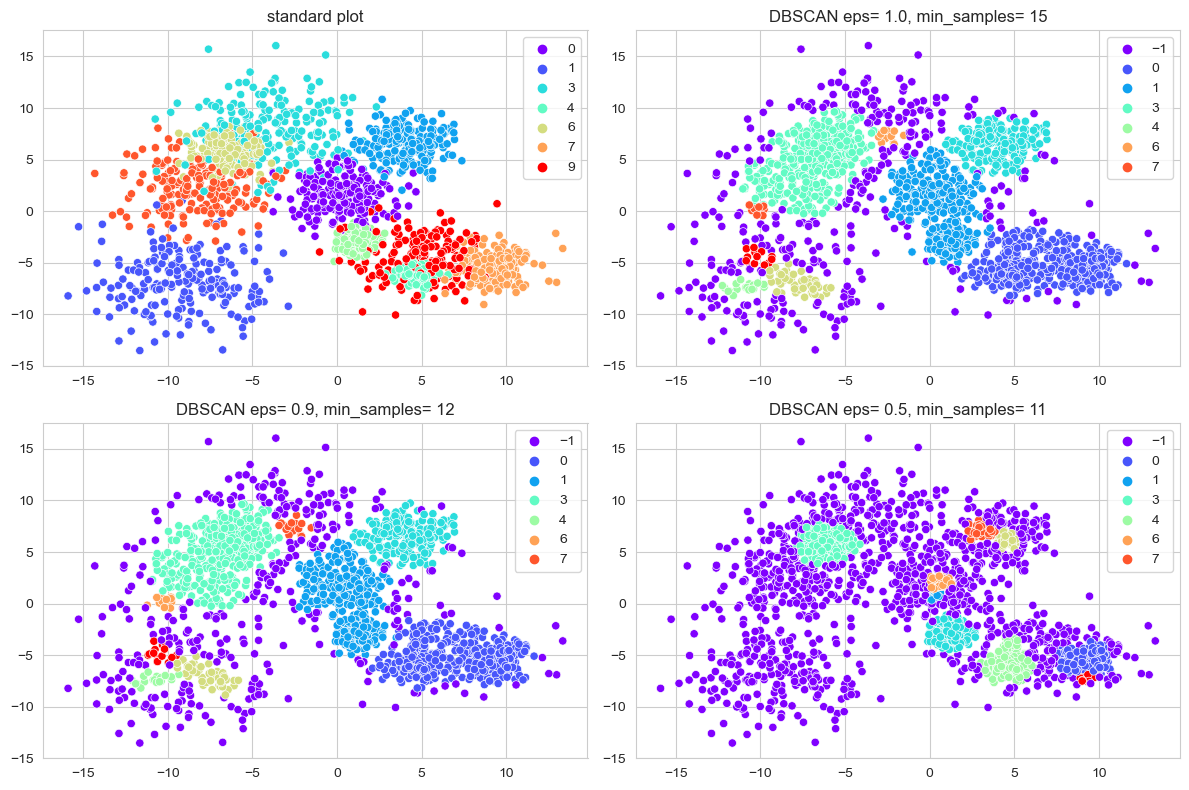

In [98]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
i = 1
ax = plt.subplot(2, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")
ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, dbscan_cluster in zip(names, dbscan_clusters):
    ax = plt.subplot(2, 2, i)
    
    dbscan_cluster.fit(data[0])

    # Plot the testing points
    sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=dbscan_cluster.labels_, palette='rainbow', edgecolors="k")
    ax.set_title(name)
    
    i += 1
        
plt.tight_layout()

plt.show()

# Fuzzy-C-Means cluster creation

In [101]:
from fcmeans import FCM

In [104]:
homogeneity = []
completeness = []
v_measure = []
adjusted_rand = []
silhouette = [0]

K = range(1, 11, 1)
for k in tqdm(K):
    FCMModel = FCM(n_clusters=k)
    FCMModel.fit(data[0])
    
    homogeneity.append(homogeneity_score(data[1], FCMModel.predict(data[0])))
    completeness.append(completeness_score(data[1], FCMModel.predict(data[0])))
    v_measure.append(v_measure_score(data[1], FCMModel.predict(data[0])))
    adjusted_rand.append(adjusted_rand_score(data[1], FCMModel.predict(data[0])))
    if k > 1:
        silhouette.append(silhouette_score(data[0], FCMModel.predict(data[0])))
    

  0%|          | 0/10 [00:00<?, ?it/s]

In [105]:
pd.DataFrame([homogeneity, completeness, v_measure, adjusted_rand, silhouette], 
             index=['homogeneity', 'completeness', 'v_measure', 'adjusted_rand', 'silhouette'], 
             columns=[str(x) + " clusters" for x in range (1,11,1)])

,1 clusters,2 clusters,3 clusters,4 clusters,5 clusters,6 clusters,7 clusters,8 clusters,9 clusters,10 clusters
homogeneity,0.0,0.223259,0.400820,0.489811,0.571121,0.616009,0.686594,0.735274,0.776136,0.797322
completeness,1.0,0.741887,0.858050,0.822570,0.844894,0.825425,0.824172,0.824301,0.825338,0.811959
v_measure,0.0,0.343229,0.546400,0.614005,0.681542,0.705505,0.749119,0.777246,0.799981,0.804574
adjusted_rand,0.0,0.150220,0.295374,0.380064,0.454853,0.501962,0.601496,0.661687,0.701540,0.723041
silhouette,0.0,0.448754,0.451203,0.439933,0.499857,0.457990,0.468988,0.487050,0.482396,0.478656


In [107]:
names = ['FCMeans with ' + str(idx) + ' clusters' for idx in range(2,11,2)]

fcmean_clusters = [FCM(n_clusters=2),
                   FCM(n_clusters=4),
                   FCM(n_clusters=6),
                   FCM(n_clusters=8),
                   FCM(n_clusters=10)]

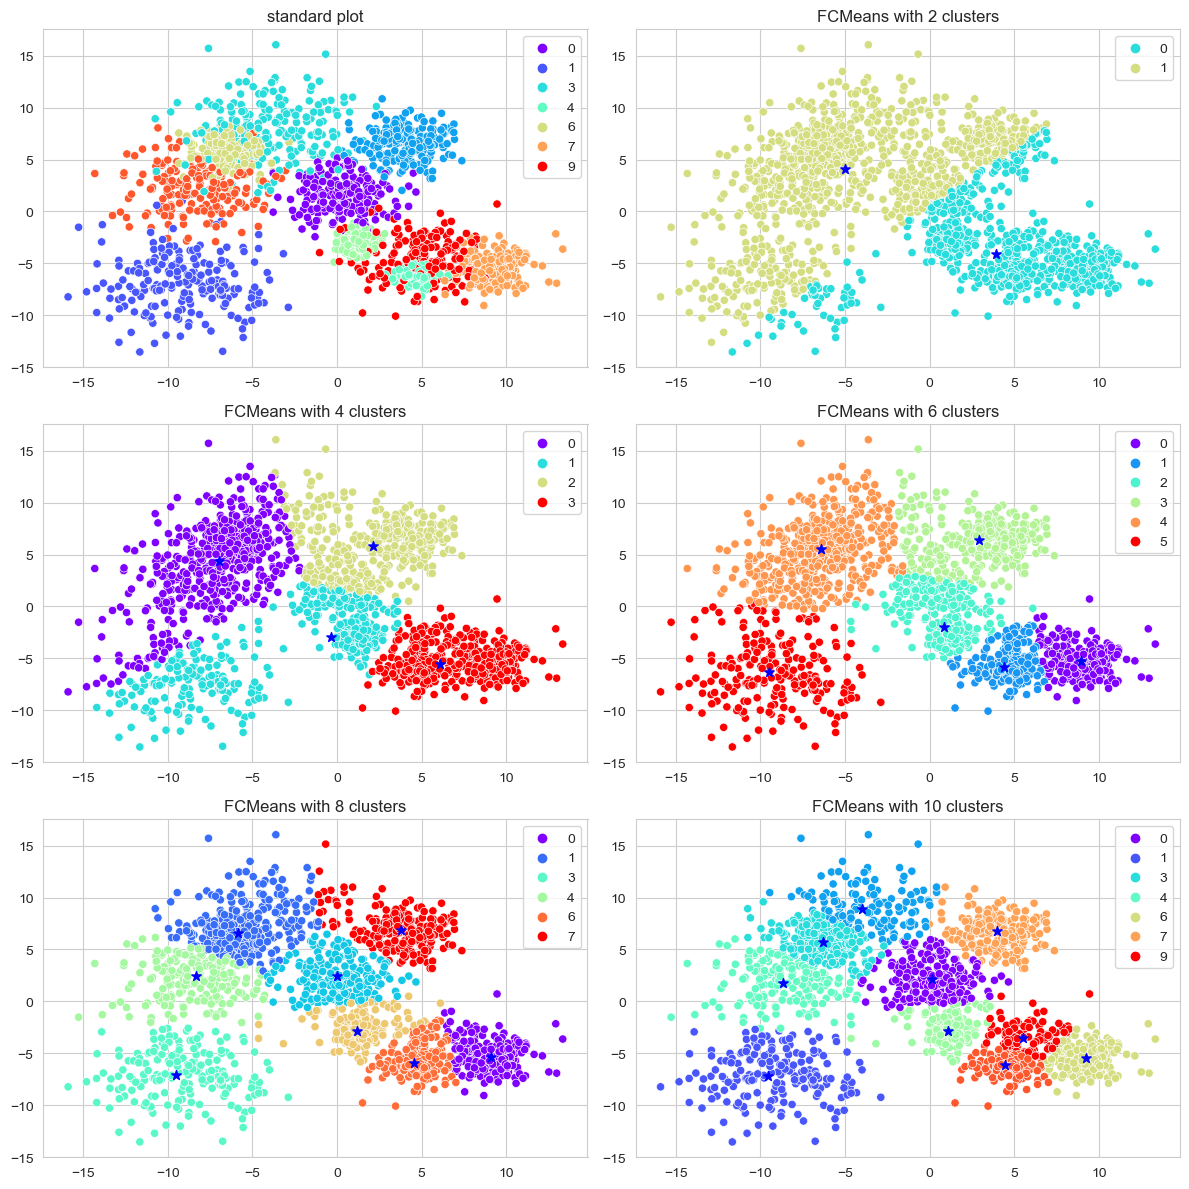

In [110]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
i = 1
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(3, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")
ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, fcm_cluster in zip(names, fcmean_clusters):
    ax = plt.subplot(3, 2, i)
    
    fcm_cluster.fit(data[0])
    
    fcm_centers = fcm_cluster.centers
    fcm_labels = fcm_cluster.predict(data[0])

    # Plot the testing points
    sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=fcm_labels, palette='rainbow', edgecolors="k")
    ax.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=50, c='b')

    ax.set_title(name)
    
    i += 1
        
plt.tight_layout()

plt.show()

# Comparing best clusterizators

In [16]:
names = ['K-Means with n_clusters=10', 'DBSCAN with eps=1.0, mi_samples=15', 'FCMeans with n_clusters=10']

all_clusters = [KMeans(n_clusters=10),
                   DBSCAN(eps=1, min_samples=15),
                   FCM(n_clusters=10)]

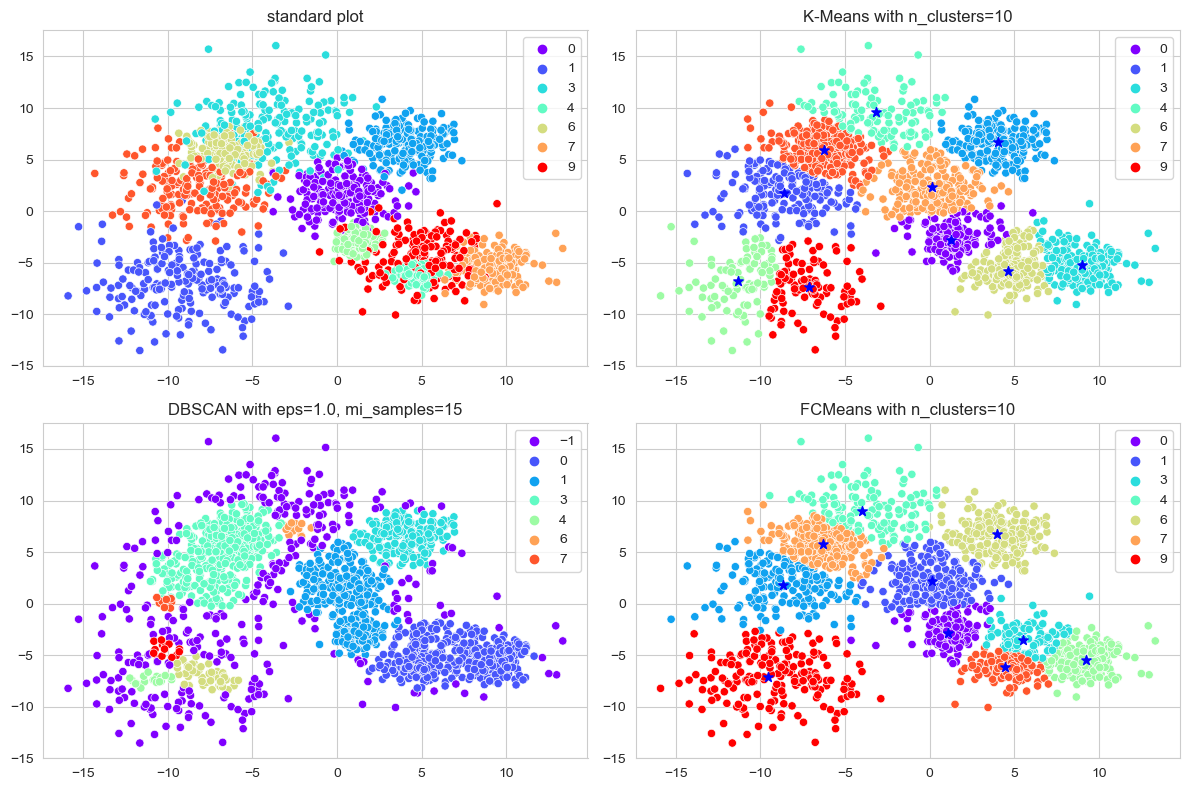

In [19]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
i = 1
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(2, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")
ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, clusterizator in zip(names, all_clusters):
    ax = plt.subplot(2, 2, i)
    
    clusterizator.fit(data[0])
    
    if name == 'FCMeans with n_clusters=10':
        fcm_centers = clusterizator.centers
        fcm_labels = clusterizator.predict(data[0])

        # Plot the testing points
        sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=fcm_labels, palette='rainbow', edgecolors="k")
        ax.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=50, c='b')
    elif name == 'K-Means with n_clusters=10':
        # Plot the testing points
        sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=clusterizator.labels_, palette='rainbow', edgecolors="k")
        ax.scatter(clusterizator.cluster_centers_[:,0], clusterizator.cluster_centers_[:,1], marker="*", s=50, c='b')
    else:
        sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=clusterizator.labels_, palette='rainbow', edgecolors="k")
        

    ax.set_title(name)
    
    i += 1
        
plt.tight_layout()

plt.show()